In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud
plt.rcParams['font.family']='SimHei'        # 设置使用黑体字体以正常显示中文
plt.rcParams['axes.unicode_minus']=False   # 正常显示负号
# 读取 JSON 数据
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 设置图表风格
# sns.set_theme(style="whitegrid", font="Arial", font_scale=1.1)

# 读取数据
with open('C:/Users/86157/PycharmProjects/数据采集/wx/BERT可视化/cleandata_idea_model.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

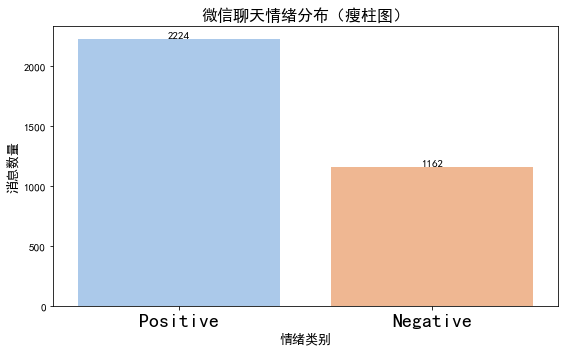

In [15]:

# 转换为 DataFrame
df = pd.DataFrame(data)
df['CreateTime'] = pd.to_datetime(df['CreateTime'])

# 准备统计数据
sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# 绘图
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=sentiment_counts, x='Sentiment', y='Count',
                 palette='pastel')  # width 控制柱形图瘦一点

# 添加数量标签
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black')

# 设置标题和标签
plt.title('微信聊天情绪分布（瘦柱图）', fontsize=16, weight='bold')
plt.xlabel('情绪类别', fontsize=13)
plt.ylabel('消息数量', fontsize=13)
plt.xticks(fontsize=20)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

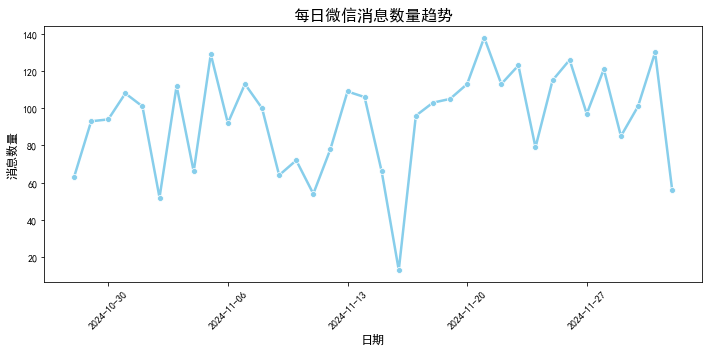

In [17]:

# 转换时间格式
df['CreateTime'] = pd.to_datetime(df['CreateTime'])

# ======================
# 图 1：每天的消息数量趋势
# ======================
df['date'] = df['CreateTime'].dt.date
daily_counts = df['date'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o', linewidth=2.5, color='skyblue')
plt.title('每日微信消息数量趋势', fontsize=16, weight='bold')
plt.xlabel('日期', fontsize=12)
plt.ylabel('消息数量', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

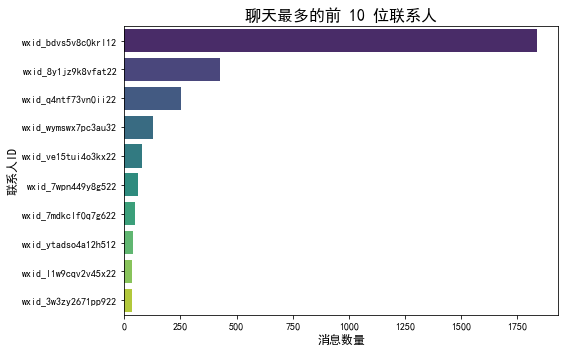

In [18]:
top_n = 10  # 你可以根据需要改为20、30等
top_talkers = df['StrTalker'].value_counts().head(top_n)

plt.figure(figsize=(8, 5))
sns.barplot(y=top_talkers.index, x=top_talkers.values, palette='viridis')
plt.title(f'聊天最多的前 {top_n} 位联系人', fontsize=16, weight='bold')
plt.xlabel('消息数量', fontsize=12)
plt.ylabel('联系人ID', fontsize=12)
plt.tight_layout()
plt.show()

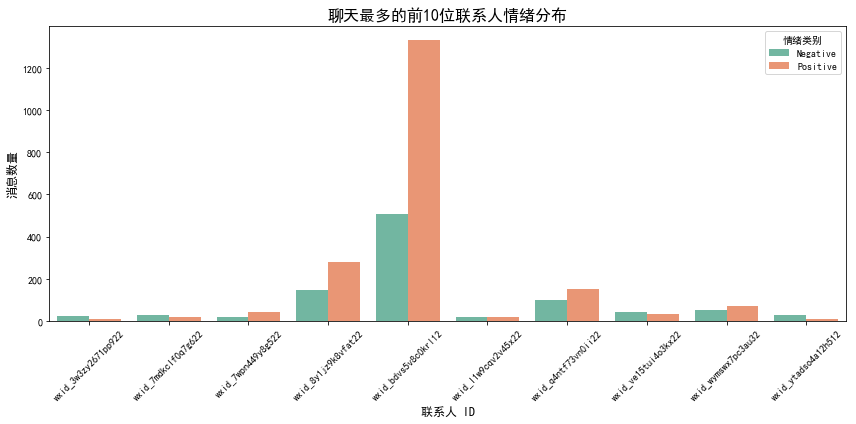

In [22]:

# 获取聊天最多的前10位联系人
top_talkers = df['StrTalker'].value_counts().head(10).index

# 过滤数据
df_top = df[df['StrTalker'].isin(top_talkers)]

# 按联系人和情绪类别统计数量
sentiment_counts = df_top.groupby(['StrTalker', 'Sentiment']).size().reset_index(name='Count')

# 画图：分组柱状图
plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_counts, x='StrTalker', y='Count', hue='Sentiment', palette='Set2')

plt.title('聊天最多的前10位联系人情绪分布', fontsize=16, weight='bold')
plt.xlabel('联系人 ID', fontsize=12)
plt.ylabel('消息数量', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='情绪类别')
plt.tight_layout()
plt.show()


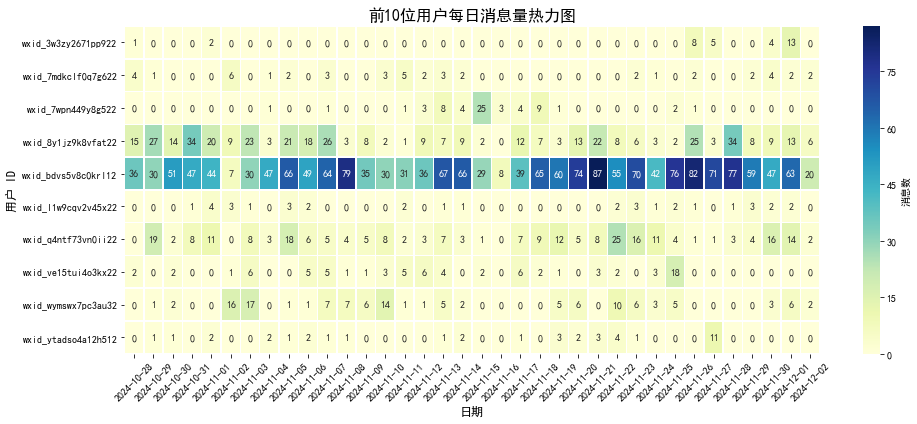

In [23]:

df = pd.DataFrame(data)
df['CreateTime'] = pd.to_datetime(df['CreateTime'])
df['Date'] = df['CreateTime'].dt.date

# 获取聊天最多的前10位用户
top_users = df['StrTalker'].value_counts().head(10).index
df_top = df[df['StrTalker'].isin(top_users)]

# 创建透视表：行是用户，列是日期，值是消息数量
pivot_table = df_top.pivot_table(
    index='StrTalker', 
    columns='Date', 
    values='CleanContent', 
    aggfunc='count', 
    fill_value=0
)

# 绘制热力图
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d', cbar_kws={'label': '消息数'})

plt.title('前10位用户每日消息量热力图', fontsize=16, weight='bold')
plt.xlabel('日期', fontsize=12)
plt.ylabel('用户 ID', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:

# ========== 2. 置信度分布 ==========
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Confidence', hue='Sentiment', bins=20, kde=True, palette='Set1')
plt.title('情绪置信度分布')
plt.show()
plt.close()


AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 432x288 with 0 Axes>

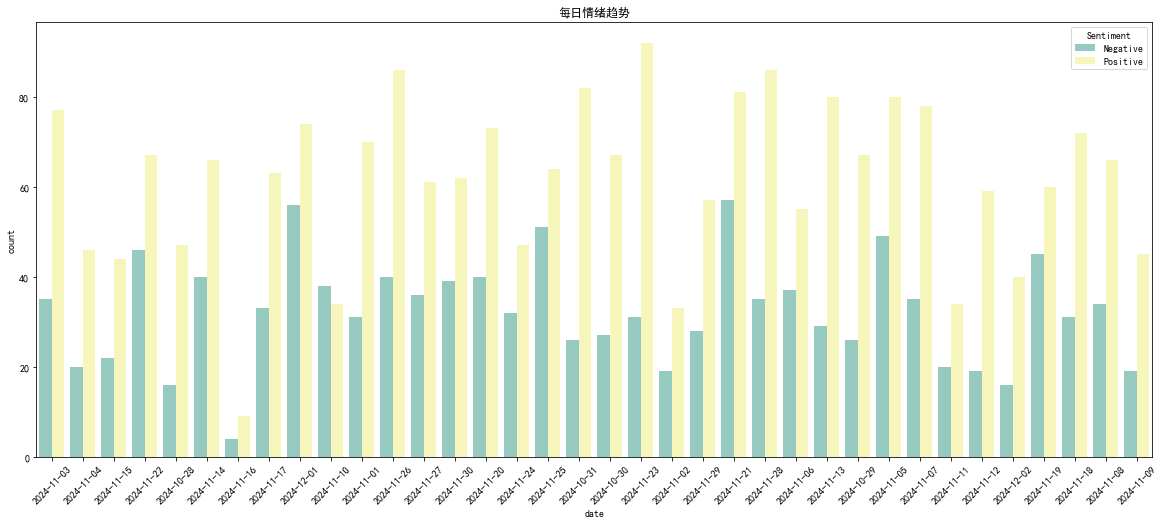

In [29]:

# ========== 3. 时间序列趋势 ==========
df['date'] = df['CreateTime'].dt.date
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='date', hue='Sentiment', palette='Set3')
plt.xticks(rotation=45)
plt.title('每日情绪趋势')
plt.show()
plt.close()
